In [0]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [0]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [0]:
print("訓練資料:", x_train.shape)
print("測試資料:", x_test.shape)

訓練資料: (50000, 32, 32, 3)
測試資料: (10000, 32, 32, 3)


In [0]:
trans = {0:"飛機", 1:"汽車", 2:"鳥",
         3:"貓", 4:"鹿", 5:"狗",
         6:"青蛙", 7:"馬", 8:"船", 
         9:"卡車"}

是什麼? 馬


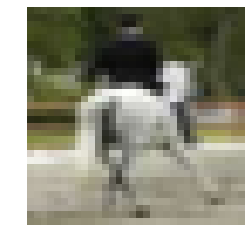

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 49999)
print("是什麼?", trans[y_train[c][0]])
plt.axis("off")
plt.imshow(x_train[c])

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), 
               padding="same", 
               activation="relu",
               input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(64, (3, 3), 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(256, activation="relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               1048832   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

In [0]:
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [0]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [0]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("Demo:", y_train_cat[0])

Demo: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
cnn.fit(x_train_norm,
        y_train_cat,
        batch_size=200,
        epochs=10,
        validation_split=0.1,
        verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 3s - loss: 1.5593 - acc: 0.4370 - val_loss: 1.2395 - val_acc: 0.5634
Epoch 2/10
 - 3s - loss: 1.1976 - acc: 0.5747 - val_loss: 1.0801 - val_acc: 0.6320
Epoch 3/10
 - 3s - loss: 1.0438 - acc: 0.6330 - val_loss: 0.9612 - val_acc: 0.6716
Epoch 4/10
 - 3s - loss: 0.9514 - acc: 0.6628 - val_loss: 0.9285 - val_acc: 0.6754
Epoch 5/10
 - 3s - loss: 0.8757 - acc: 0.6946 - val_loss: 0.8669 - val_acc: 0.7082
Epoch 6/10
 - 3s - loss: 0.8209 - acc: 0.7124 - val_loss: 0.8604 - val_acc: 0.7014
Epoch 7/10
 - 3s - loss: 0.7630 - acc: 0.7328 - val_loss: 0.8199 - val_acc: 0.7234
Epoch 8/10
 - 3s - loss: 0.7008 - acc: 0.7521 - val_loss: 0.8272 - val_acc: 0.7214
Epoch 9/10
 - 3s - loss: 0.6554 - acc: 0.7701 - val_loss: 0.8138 - val_acc: 0.7258
Epoch 10/10
 - 3s - loss: 0.6062 - acc: 0.7879 - val_loss: 0.7808 - val_acc: 0.7376


In [0]:
cnn.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 1s 73us/step


[0.8063116326332093, 0.7222]

In [0]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pre = cnn.predict_classes(x_test_norm)
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,742,15,81,21,19,9,11,9,61,32
1,31,813,8,13,2,7,8,4,36,78
2,47,6,623,62,79,70,66,30,9,8
3,16,12,91,531,48,174,65,29,19,15
4,19,3,85,54,664,39,53,66,13,4
5,10,3,46,165,37,669,18,35,10,7
6,3,0,58,67,28,33,800,2,7,2
7,10,1,37,41,48,82,5,761,5,10
8,65,29,10,16,7,11,6,5,829,22
9,39,79,14,16,1,11,10,10,30,790


0:飛機, 1:汽車, 2:鳥, 3:貓, 4:鹿, 5:狗, 6:青蛙, 7:馬, 8:船, 9:卡車

In [0]:
y_test.reshape(10000)

array([3, 8, 8, ..., 5, 1, 7])

到底有幾個預測錯誤: 2778


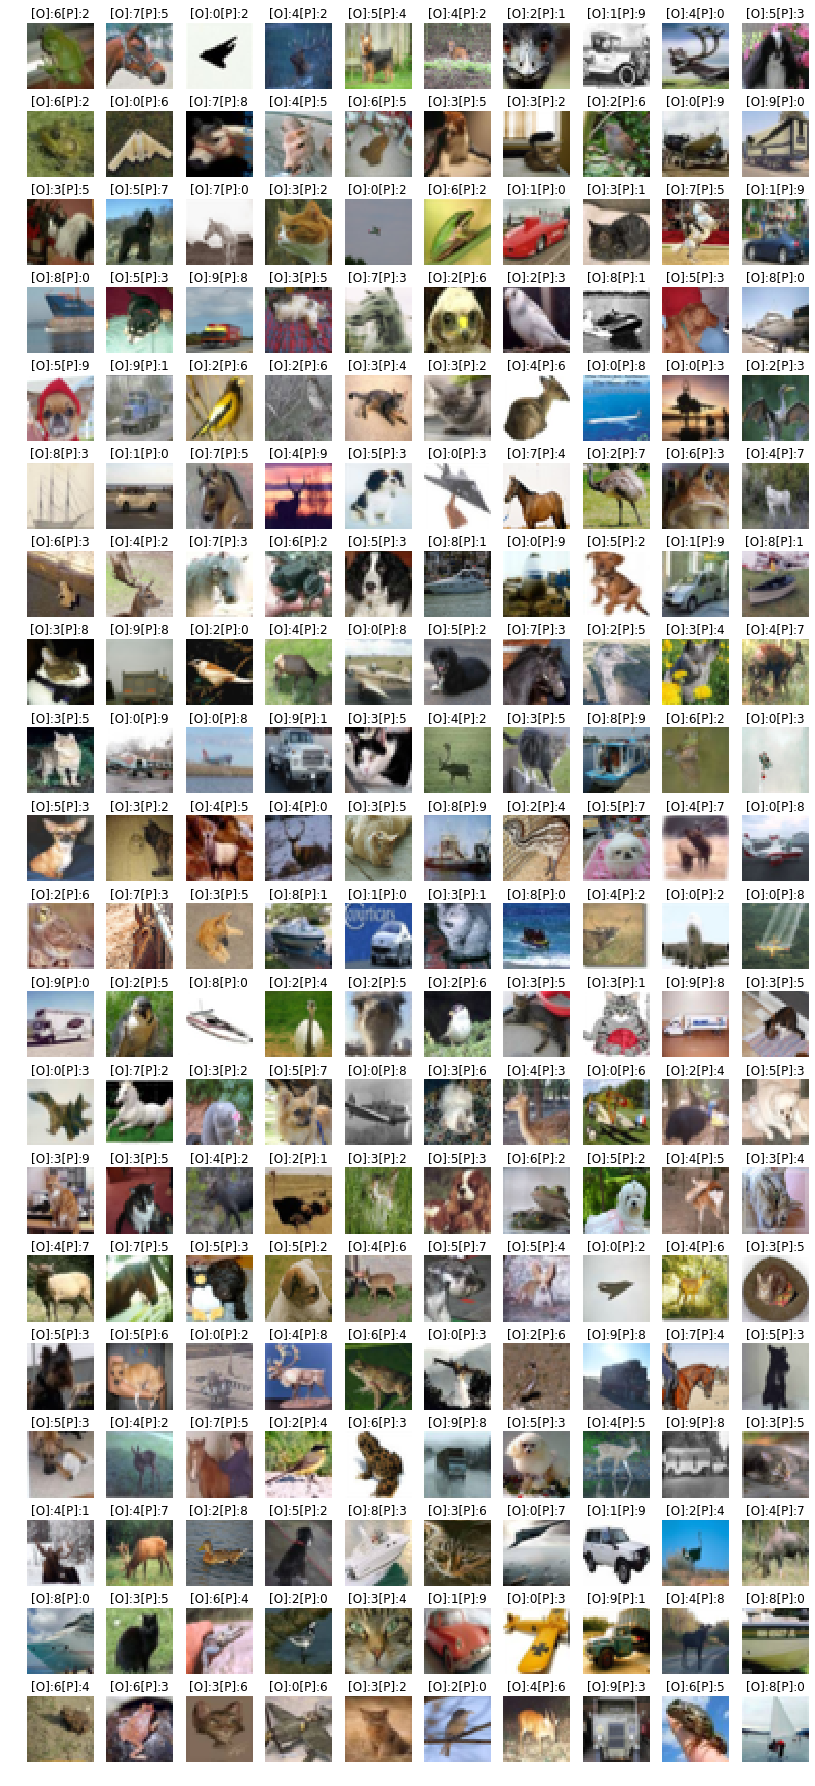

In [0]:
import numpy as np
false_index = np.nonzero(pre != y_test.reshape(10000))[0]
print("到底有幾個預測錯誤:", len(false_index))
false_img = x_test[false_index]
ori_label = y_test[false_index]
pre_label = pre[false_index]

width = 10
height = int(len(false_index) / 10) + 1
plt.figure(figsize=(14, 450))
for (index, img) in enumerate(false_img[:200]):
    plt.subplot(height, width, index + 1)
    msg = "[O]:" + str(ori_label[index][0]) + "[P]:" + str(pre_label[index])
    plt.title(msg)
    plt.axis("off")
    plt.imshow(img)